In [1]:
import numpy as np
import cupy as cp

import warnings
warnings.filterwarnings('ignore') 

from skimage import data,transform,color,io

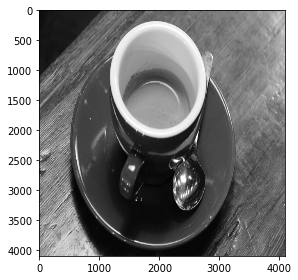

In [2]:
#画像のロード
np_img = data.coffee()#コーヒーカップ画像をロード

np_img  = transform.resize(np_img, (4096,4096))#4096*4096にリサイズ
np_img = color.rgb2gray(np_img)#グレースケール化
np_img = np_img.astype('f')


io.imshow(np_img)#表示

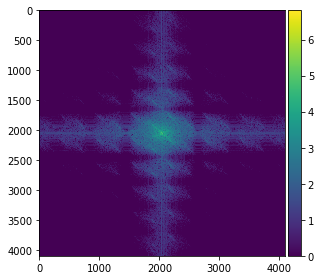

In [3]:
#フーリエ変換
cp_img = cp.asarray(np_img)#numpy配列 ⇒ cupy配列に変換
cp_fimg = cp.fft.fft2(cp_img)#【フーリエ変換】
cp_fimg = cp.fft.fftshift(cp_fimg)#fftshiftを使ってシフト

#パワースペクトルで表示
cp_fabs = cp.absolute(cp_fimg)#絶対値をとる
cp_fabs[cp_fabs < 1] = 1  # スケール調整用に1以下を1にする
cp_fpow = cp.log10(cp_fabs)  # logをとってパワースペクトル化

np_fpow = cp.asnumpy(cp_fpow)#cupy配列 ⇒ numpy配列に変換

io.imshow(np_fpow)#表示

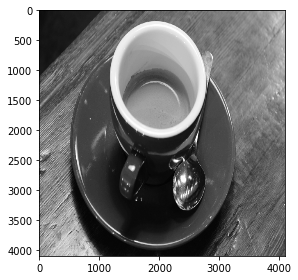

In [4]:
#フーリエ逆変換
cp_ffimg = cp.fft.ifftshift(cp_fimg)#シフトを戻す
cp_ffimg = cp.fft.ifft2(cp_ffimg)#【フーリエ逆変換】
cp_ffimg = cp.absolute(cp_ffimg)#絶対値をとって虚数をなくす

np_ffimg = cp.asnumpy(cp_ffimg)#cupy配列 ⇒ numpy配列に変換

io.imshow(cp.asnumpy(np_ffimg))#表示

In [5]:
%%time
for i in range(10): # cupy 10セット(フーリエ変換⇒シフト⇒シフト⇒フーリエ逆変換)計算時間
    cp_fimg = cp.fft.fftshift(cp.fft.fft2(cp_img))
    cp_ffimg = cp.fft.ifft2(cp.fft.ifftshift(cp_fimg))

Wall time: 34.1 ms


In [6]:
%%time 
for i in range(10): # numpy 10セット(フーリエ変換⇒シフト⇒シフト⇒フーリエ逆変換)計算時間
    np_fimg = np.fft.fftshift(np.fft.fft2(np_img))
    np_ffimg = np.fft.ifft2(np.fft.ifftshift(np_fimg))

Wall time: 30.4 s
